In [1]:
import numpy as np;
import pandas as pd;

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

import matplotlib.pyplot as plt;

In [4]:
acs_data = pd.read_csv('../data/acs_5yr_merged_v2.csv', index_col = 0);

In [30]:
allhomes = pd.read_csv('../data/Zip_Zri_AllHomesPlusMultifamily.csv', index_col = 0);
multifamily = pd.read_csv('../data/Zip_Zri_MultiFamilyResidenceRental.csv', index_col = 0);

In [113]:
allhomes_zips = list(allhomes["RegionName"].unique());
multi_zips = list(multifamily["RegionName"].unique());

In [114]:
union_zips = allhomes_zips + [x for x in multi_zips if x not in allhomes_zips];

In [117]:
print(len(allhomes_zips), len(multi_zips));
print(len(union_zips));
print(len([x for x in multi_zips if x in allhomes_zips]));

13181 1861
13257
1785


In [31]:
def zillow_id_check(acs):
    acs_zips_in_allhomes = acs[acs['geo_id'].map(lambda x: True if x in allhomes_zips else False)]
    acs_zips_in_multi = acs[acs['geo_id'].map(lambda x: True if x in multi_zips else False)]
    return acs_zips_in_allhomes, acs_zips_in_multi;

In [5]:
acs_data.head()

,do_date,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,male_pop,female_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,two_or_more_races_pop,not_hispanic_pop,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_45_59_mins,income_less_10000,income_10000_14999,income_15000_19999,income_20000_24999,income_25000_29999,income_30000_34999,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_100000_124999,income_125000_149999,income_150000_199999,income_200000_or_more,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,married_households,occupied_housing_units,housing_units_renter_occupied,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,male_under_5,male_5_to_9,male_10_to_14,male_15_to_17,male_18_to_19,male_20,male_21,male_22_to_24,male_25_to_29,male_30_to_34,male_35_to_39,male_40_to_44,male_45_to_49,male_50_to_54,male_55_to_59,male_60_61,male_62_64,male_65_to_66,male_67_to_69,male_70_to_74,male_75_to_79,male_80_to_84,male_85_and_over,female_under_5,female_5_to_9,female_10_to_14,female_15_to_17,female_18_to_19,female_20,female_21,female_22_to_24,female_25_to_29,female_30_to_34,female_35_to_39,female_40_to_44,female_45_to_49,female_50_to_54,female_55_to_59,female_60_to_61,female_62_to_64,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over,white_including_hispanic,black_including_hispanic,amerindian_including_hispanic,asian_including_hispanic,commute_5_9_mins,commute_35_39_mins,commute_40_44_mins,commute_60_89_mins,commute_90_more_mins,households_retirement_income,armed_forces,civilian_labor_force,employed_pop,unemployed_pop,not_in_labor_force,pop_16_over,pop_in_labor_force,asian_male_45_54,asian_male_55_64,black_male_45_54,black_male_55_64,hispanic_male_45_54,hispanic_male_55_64,white_male_45_54,white_male_55_64,bachelors_degree_2,bachelors_degree_or_higher_25_64,children,children_in_single_female_hh,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administration,employed_retail_trade,employed_science_management_ad

In [6]:
missing = np.sum(acs_data.isnull(), axis = 0);
df = acs_data;
print(missing[missing > 0])

median_year_structure_built                                     6015
median_age                                                      3472
median_income                                                  10231
income_per_capita                                               4143
median_rent                                                    38050
percent_income_spent_on_rent                                   35399
renter_occupied_housing_units_paying_cash_median_gross_rent    37469
owner_occupied_housing_units_lower_value_quartile              14304
owner_occupied_housing_units_median_value                      12695
owner_occupied_housing_units_upper_value_quartile              12729
gini_index                                                      6145
dtype: int64


In [ ]:
# for col in df.columns:
#     if  np.sum(df[df[col].isnull()]) == 33120:
#                print(df[df[col].isnull()].value_counts("do_date"))


In [9]:
curious_column = [x for x in acs_data.columns if (acs_data[acs_data[x].isnull()].shape[0] > 1100) & (acs_data[acs_data[x].isnull()].shape[0] % 33120 != 0)]

In [10]:
def plot_missing(col):
    df = acs_data[acs_data[col].isnull()]
    df = df.reset_index()

    temp = df.groupby("geo_id").agg({"do_date": "count"})
    temp = temp.reset_index().groupby("do_date").agg({"geo_id": "count"})

    plt.bar(temp.index, temp["geo_id"])
    plt.title("Histogram of missing:" + col)
    plt.show()
    return;

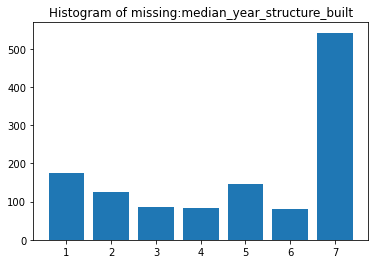

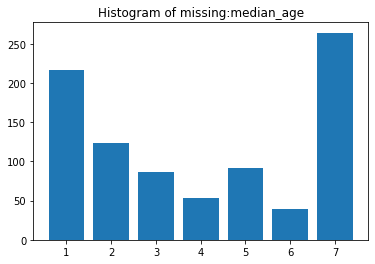

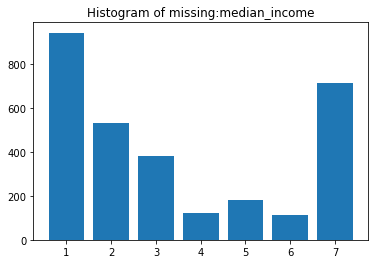

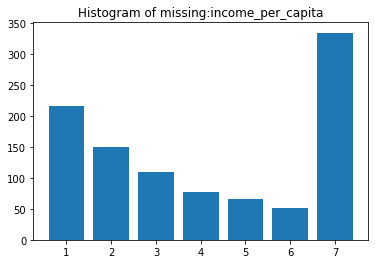

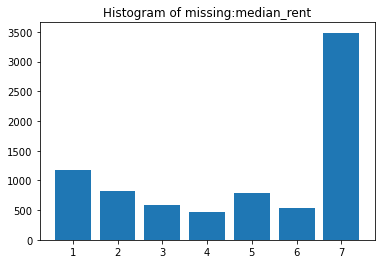

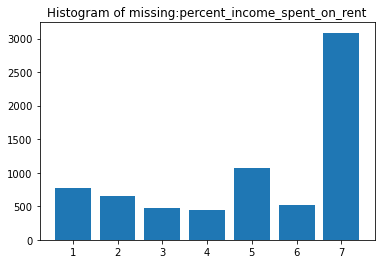

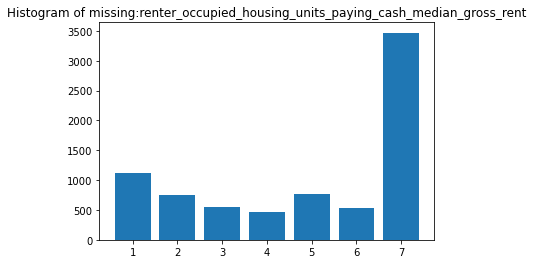

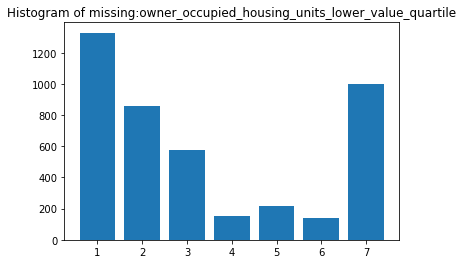

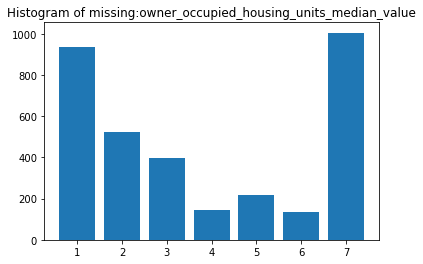

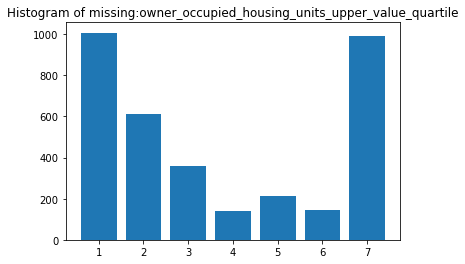

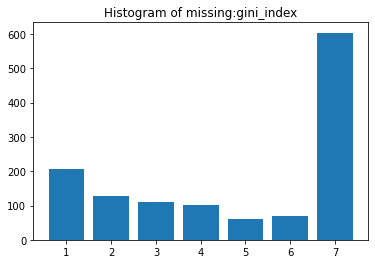

In [13]:
for col in curious_column:
    plot_missing(col);

In [14]:
df_withNA = acs_data[curious_column]
mask = df_withNA.apply(lambda x : bool(np.sum(x.isnull())), axis = 1)
df_withNA = df_withNA[mask]

In [15]:
df_withNA.shape

(43325, 11)

In [18]:
temp = df_withNA.apply(lambda x: np.sum(x.isnull()), axis = 1)

In [25]:
temp = pd.DataFrame({"geo_id" : temp.index, "missing" : temp})
temp.reset_index(drop = True, inplace = True)

In [38]:
geo_id_with_missing = temp.groupby("geo_id").count() # 9227 geoids missing at least one
geo_id_with_missing.reset_index(inplace = True);

### Checking how many `geo_id`s with missing values are also in the Zillow data

... so that we know how many we need to check...

In [43]:
missing_geo_id = geo_id_with_missing["geo_id"].unique()
len(missing_geo_id) # 9227

9227

In [45]:
len(allhomes)

13181

In [47]:
missing_geo_in_allhomes = [x for x in allhomes_zips if x in missing_geo_id];
len(missing_geo_in_allhomes)

1363

In [48]:
missing_geo_in_multifamily = [x for x in multi_zips if x in missing_geo_id];
len(missing_geo_in_multifamily)

250

- 250 geo_ids in multifamily still has unresolved missing values
- 1363 geo_ids in allfamily still has unresolved missing values

In [51]:
drop_rent = ["median_rent",
             "percent_income_spent_on_rent",
             "renter_occupied_housing_units_paying_cash_median_gross_rent"];

In [53]:
df_phase1 = df_withNA.copy();
df_phase1.drop(drop_rent, axis = 1, inplace = True);

In [55]:
df_phase1.head()

,median_year_structure_built,median_age,median_income,income_per_capita,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,gini_index
geo_id,,,,,,,,
1003,2005.0,19.9,NaN,3483.0,NaN,NaN,NaN,NaN
1003,2003.0,19.9,165865.0,3375.0,NaN,NaN,NaN,0.1537
1003,NaN,19.9,NaN,3531.0,NaN,NaN,NaN,0.1622
1003,NaN,20.0,NaN,3925.0,NaN,NaN,NaN,0.1622
1003,1959.0,19.9,NaN,3855.0,NaN,NaN,NaN,0.4687


In [54]:
temp.reset_index(inplace = True)
temp_cnt = temp.groupby("tot_missing").agg("count")["geo_id"]


### Merging with Zillow 32461

In [138]:
union_zips_temp = union_zips.copy();
union_zips_temp.remove(32461);

In [140]:
df = acs_data.drop(drop_rent, axis = 1);
df.reset_index(inplace = True);

In [142]:
df = df[df["geo_id"].isin(union_zips_temp)];
df.set_index("geo_id", inplace = True);

In [152]:
check_columns = ["do_date",
                 "median_year_structure_built", "median_age", "median_income",
                 "income_per_capita", "owner_occupied_housing_units_lower_value_quartile",
                 "owner_occupied_housing_units_median_value",
                 "owner_occupied_housing_units_upper_value_quartile", "gini_index"];

In [153]:
df_inspect = df[check_columns]

In [154]:
missing = np.sum(df_inspect.isnull(), axis = 0);
print(missing[missing > 0])

median_year_structure_built                          64
median_income                                        15
owner_occupied_housing_units_lower_value_quartile    80
owner_occupied_housing_units_median_value            27
owner_occupied_housing_units_upper_value_quartile    22
dtype: int64


In [146]:
check_columns_phase2 = ["do_date",
                        "median_year_structure_built", "median_income",
                        "owner_occupied_housing_units_lower_value_quartile",
                        "owner_occupied_housing_units_median_value",
                        "owner_occupied_housing_units_upper_value_quartile"];

In [163]:
acs_data.head()

,do_date,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,male_pop,female_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,two_or_more_races_pop,not_hispanic_pop,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_45_59_mins,income_less_10000,income_10000_14999,income_15000_19999,income_20000_24999,income_25000_29999,income_30000_34999,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_100000_124999,income_125000_149999,income_150000_199999,income_200000_or_more,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,married_households,occupied_housing_units,housing_units_renter_occupied,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,male_under_5,male_5_to_9,male_10_to_14,male_15_to_17,male_18_to_19,male_20,male_21,male_22_to_24,male_25_to_29,male_30_to_34,male_35_to_39,male_40_to_44,male_45_to_49,male_50_to_54,male_55_to_59,male_60_61,male_62_64,male_65_to_66,male_67_to_69,male_70_to_74,male_75_to_79,male_80_to_84,male_85_and_over,female_under_5,female_5_to_9,female_10_to_14,female_15_to_17,female_18_to_19,female_20,female_21,female_22_to_24,female_25_to_29,female_30_to_34,female_35_to_39,female_40_to_44,female_45_to_49,female_50_to_54,female_55_to_59,female_60_to_61,female_62_to_64,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over,white_including_hispanic,black_including_hispanic,amerindian_including_hispanic,asian_including_hispanic,commute_5_9_mins,commute_35_39_mins,commute_40_44_mins,commute_60_89_mins,commute_90_more_mins,households_retirement_income,armed_forces,civilian_labor_force,employed_pop,unemployed_pop,not_in_labor_force,pop_16_over,pop_in_labor_force,asian_male_45_54,asian_male_55_64,black_male_45_54,black_male_55_64,hispanic_male_45_54,hispanic_male_55_64,white_male_45_54,white_male_55_64,bachelors_degree_2,bachelors_degree_or_higher_25_64,children,children_in_single_female_hh,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administration,employed_retail_trade,employed_science_management_ad

In [162]:
if "geo_id" not in df_inspect.columns: df_inspect.reset_index(inplace = True);
    
for col in check_columns_phase2[1:]:
    temp = df_inspect[df_inspect[col].isnull()];
    temp.reset_index(inplace = True);
    print(col);
    for zipid in temp["geo_id"].unique():
        print(zipid);
        temp2 = df_inspect[df_inspect["geo_id"]==zipid];
        print(temp2[["geo_id", "do_date", col]]);
        print("\n")

median_year_structure_built
11109
       geo_id   do_date  median_year_structure_built
10395   11109  20072011                       2005.0
10396   11109  20082012                          NaN
10397   11109  20092013                       2004.0
10398   11109  20102014                       2005.0
10399   11109  20112015                       2005.0
10400   11109  20122016                       2007.0
10401   11109  20132017                       2009.0


19032
       geo_id   do_date  median_year_structure_built
17717   19032  20072011                       1955.0
17718   19032  20082012                       1954.0
17719   19032  20092013                       1954.0
17720   19032  20102014                       1955.0
17721   19032  20112015                          NaN
17722   19032  20122016                       1955.0
17723   19032  20132017                       1956.0


20841
       geo_id   do_date  median_year_structure_built
20013   20841  20072011                          

       geo_id   do_date  owner_occupied_housing_units_lower_value_quartile
73094   78215  20072011                                           166300.0
73095   78215  20082012                                           150400.0
73096   78215  20092013                                            57500.0
73097   78215  20102014                                           137900.0
73098   78215  20112015                                                NaN
73099   78215  20122016                                                NaN
73100   78215  20132017                                                NaN


80459
       geo_id   do_date  owner_occupied_housing_units_lower_value_quartile
75782   80459  20072011                                           164400.0
75783   80459  20082012                                           166500.0
75784   80459  20092013                                           170700.0
75785   80459  20102014                                           182200.0
75786   80459  20

In [109]:
merged_multifamily = pd.merge(df, multifamily, how = "inner", left_index = True, right_on = "RegionName");

In [110]:
temp = merged_multifamily[check_columns]
missing = np.sum(temp.isnull(), axis = 0);
print(missing[missing > 0])

median_year_structure_built                           6
owner_occupied_housing_units_lower_value_quartile    12
owner_occupied_housing_units_median_value             8
owner_occupied_housing_units_upper_value_quartile     8
dtype: int64


In [86]:
merged_multifamily.reset_index(inplace = True)

In [88]:
test = merged_multifamily["index"].unique()

In [ ]:
for col in check_columns:
    merged_allhomes

In [73]:
merged_allhomes[merged_allhomes["median_year_structure_built"].isnull()].groupby("do_date")["geo_id"].count()

KeyError: 'Column not found: geo_id'

In [ ]:
# allhomes
# multifamily

In [ ]:
temp["tot_missing"].value_counts()

In [ ]:
missing_geo = temp["geo_id"].unique()

In [16]:
temp2 = df_withNA.groupby("geo_id").agg(lambda x: sum(x.isnull()));

In [17]:
print(temp2.shape)
temp2.head()

(9227, 11)


,median_year_structure_built,median_age,median_income,income_per_capita,median_rent,percent_income_spent_on_rent,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,gini_index
geo_id,,,,,,,,,,,
1003,2.0,0.0,4.0,0.0,4.0,5.0,4.0,7.0,7.0,7.0,1.0
1008,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1009,0.0,0.0,1.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0
1029,0.0,0.0,0.0,0.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0
1034,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
temp3 = temp2.copy();

In [ ]:
temp3.drop("aggregate_travel_time_to_work", axis = 1, inplace = True);

In [ ]:
temp3["missing_max"] = temp3.apply(lambda x: max(x), axis = 1);
temp3["missing_min"] = temp3.apply(lambda x: min(x), axis = 1);


In [ ]:
temp3["missing_max"].value_counts()

In [ ]:
temp3["missing_min"].value_counts()

In [ ]:
temp3.drop(["missing_max", "missing_min", "median_rent", "percent_income_spent_on_rent", "renter_occupied_housing_units_paying_cash_median_gross_rent"], axis =1, inplace = True);

In [ ]:
temp3["missing_max"] = temp3.apply(lambda x: max(x), axis = 1);
temp3["missing_min"] = temp3.apply(lambda x: min(x), axis = 1);


In [ ]:
temp3["missing_max"].value_counts()

In [166]:
acs_data.head()

,do_date,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,male_pop,female_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,two_or_more_races_pop,not_hispanic_pop,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_45_59_mins,income_less_10000,income_10000_14999,income_15000_19999,income_20000_24999,income_25000_29999,income_30000_34999,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_100000_124999,income_125000_149999,income_150000_199999,income_200000_or_more,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,married_households,occupied_housing_units,housing_units_renter_occupied,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,male_under_5,male_5_to_9,male_10_to_14,male_15_to_17,male_18_to_19,male_20,male_21,male_22_to_24,male_25_to_29,male_30_to_34,male_35_to_39,male_40_to_44,male_45_to_49,male_50_to_54,male_55_to_59,male_60_61,male_62_64,male_65_to_66,male_67_to_69,male_70_to_74,male_75_to_79,male_80_to_84,male_85_and_over,female_under_5,female_5_to_9,female_10_to_14,female_15_to_17,female_18_to_19,female_20,female_21,female_22_to_24,female_25_to_29,female_30_to_34,female_35_to_39,female_40_to_44,female_45_to_49,female_50_to_54,female_55_to_59,female_60_to_61,female_62_to_64,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over,white_including_hispanic,black_including_hispanic,amerindian_including_hispanic,asian_including_hispanic,commute_5_9_mins,commute_35_39_mins,commute_40_44_mins,commute_60_89_mins,commute_90_more_mins,households_retirement_income,armed_forces,civilian_labor_force,employed_pop,unemployed_pop,not_in_labor_force,pop_16_over,pop_in_labor_force,asian_male_45_54,asian_male_55_64,black_male_45_54,black_male_55_64,hispanic_male_45_54,hispanic_male_55_64,white_male_45_54,white_male_55_64,bachelors_degree_2,bachelors_degree_or_higher_25_64,children,children_in_single_female_hh,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administration,employed_retail_trade,employed_science_management_ad